### Exercise 1: Final Project Topic


I want to do a project like the first option listed in the topics document; the binary star system with a planet orbiting. I did a project a couple of summers ago involving the Transiting Exoplanet Survey Satellite (TESS) data and used the radial velocity exoplanet detection method to attempt to corroborate the TESS data. TESS found evidence of a planet orbiting a star by the transit method, where the luminosity of the star is studied and when it dips periodically it is evidence of a planet passing in front of it. This star was very young and active however, so it was hard to determine if the planet existed or was just noise from the stellar activity. The radial velocity method was used to attempt to determine the mass of the planet from the radial motion of the star caused by the pull of the planet. This was also unclear, so my job was to inject 40 different planets into the star system, ranging from 1 – 20 Earth masses (in 0.5 step sizes). This was meant to determine the upper limit of the mass of the planet that may exist around the star. The point of the project was to show what would be possible to see and avoid others wasting time by trying to look for something over this upper limit because the work had already been done. I would like to take that project and attempt to animate it where it shows the star in the center and then put planets of different masses around the star and show the star’s radial movement. This would happen for 40 different planet masses and the amount the star moves would increase as the planet gets more massive. I could make it a binary system if you would like that added complexity. I just thought it would be interesting to see what before was just numerical data. I am happy to make changes to this idea to make it more complex if you feel it would be too simple. I am also fine with just doing the three-body problem from the topics document if you think the above will not work. 

### Exercise 2: The Diffraction Limit of a Telescope


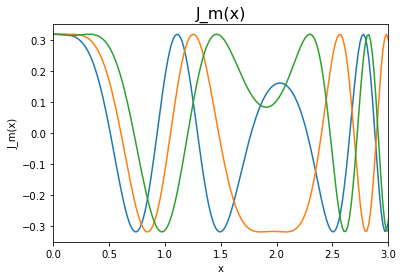

In [5]:
#(i):

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def J_m(theta, m):
    return (1/np.pi) * (np.cos((m * theta) - (x * np.sin(theta)))) 

theta_min = 0
theta_max = np.pi

numberSteps = 199
binWidth = (theta_max - theta_min)/float(numberSteps)
x = np.arange(0, 20, 0.1)
m = 0
# Simpson's rule summation
numericalInt = J_m(theta_min, m) + J_m(theta_max, m)
theta_i = theta_min
for i in range(numberSteps-1):
    theta_i = theta_i + binWidth
    factor = 2
    if i%2 == 0:
        factor = 4

    numericalInt += J_m(theta_i, m)*factor
numericalInt *= binWidth/3.

# plot function and parabolas
theta = np.arange(theta_min, theta_max, 0.01)
theta_bound = np.arange(theta_min, theta_max+binWidth, binWidth)
plt.xlim(0, 3)
plt.plot(theta_bound, J_m(theta_bound, m = 0))
plt.plot(theta_bound, J_m(theta_bound, m = 1))
plt.plot(theta_bound, J_m(theta_bound, m = 2))
plt.xlabel("x")
plt.ylabel("J_m(x)")
plt.title("J_m(x)", fontsize=16)
plt.show()


### Exercise 3: The Stefan-Boltzmann Constant

(i): I used the midpoint rule and transform the integral using z = 1/x+1 to make it easier to evaluate numerically. This would change the bounds to (0, 1) and only make the integral mildly more complicated. There is still an exopnential in the denominator and a variable to the third power in the numerator so it could become computationally intensive in certain situations. I think this is a good choice for this integral though.

Gaussian quadrature: (6.493939265515766, 6.890289849792453e-08)
General integration: (6.49393940226683, 2.62847130244751e-09)
Numerical value integral: 6.493939402266796
Numerical integral error: 5.1972736205119844e-15


<ipython-input-2-e2d169d2ac76>:13: RuntimeWarning: overflow encountered in exp
  return (((z**3) / (1 - z)**3) / (((exp(z / (1 - z))) - 1) * ((1 - z)**2)))
<ipython-input-2-e2d169d2ac76>:10: RuntimeWarning: overflow encountered in exp
  return (x**3) / (exp(x) - 1)
<ipython-input-2-e2d169d2ac76>:10: RuntimeWarning: invalid value encountered in true_divide
  return (x**3) / (exp(x) - 1)


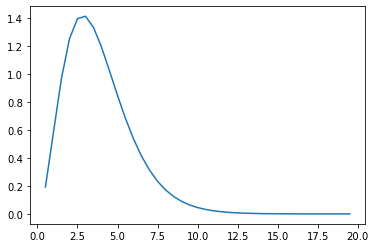

In [2]:
#(ii)

from numpy import inf, tan, cos, pi, exp, expm1
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt


def func(x):
    return (x**3) / (exp(x) - 1)

def transformed_func(z):
    return (((z**3) / (1 - z)**3) / (((exp(z / (1 - z))) - 1) * ((1 - z)**2)))

xmin = 0
xmax = 1

numberSteps = 1000
binWidth = (xmax - xmin)/float(numberSteps)

# the midpoint rule summation
numericalInt = 0
xi = xmin
for i in range(numberSteps):
    xii = xi + binWidth
    midPoint = (xi+xii)/2
    numericalInt += transformed_func(midPoint)
    xi = xii
numericalInt *= binWidth

y = integrate.quad(func, 0, inf)

x_vals = np.arange(0, 20, 0.5)

print("Gaussian quadrature:", integrate.quadrature(transformed_func, 0, 1))
print("General integration:", y)
print("Numerical value integral:", numericalInt)
print('Numerical integral error:', np.abs((numericalInt - y[0]) / y[0]))
plt.plot(x_vals, func(x_vals))
plt.show()

In [3]:
#(iii)

from scipy.constants import c, hbar, k, sigma



calculated_sigma = (numericalInt * (k**4) / (4 * (pi**2) * (c**2) * (hbar**3)))

W_y = (y[0] * (k**4) / (4 * (pi**2) * (c**2) * (hbar**3)))

print('Stefan-Boltzmann Constant = ', sigma)
print('Calculated Stefan-Boltzmann Constant =', calculated_sigma)
print('actualInt =', y[0])
print('W_y =', W_y)
print('W_y comparsion =', np.abs((W_y - sigma) / sigma))
print('Comparison = ', np.abs((calculated_sigma - sigma) / sigma))


Stefan-Boltzmann Constant =  5.670374419e-08
Calculated Stefan-Boltzmann Constant = 5.6703744191844e-08
actualInt = 6.49393940226683
W_y = 5.67037441918443e-08
W_y comparsion = 3.2525219849735846e-11
Comparison =  3.251996825612818e-11
